In [38]:
#importing pandas & numpy libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import math
import plotly.express as px

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
df3 = pd.read_csv('user_overview_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
df3

,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Total Youtube Data,Total Google Data,Total Email Data,Total Netflix Data,Total Gaming Data,...,Total SocialMedia Data,Total DL and UL,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps)
0,1.311448e+19,3.368542e+10,Samsung,Samsung Galaxy A8 (2018),243504.0,32045297.0,7072799.0,3535210.0,28489330.0,522331573.0,...,2448331.0,599743023.0,467.0,829.0,1555910280000,1556153760000,127.458589,243504362.0,76881.0,69.0
1,1.311448e+19,3.366132e+10,Apple,Apple iPhone 7 (A1778),236570.0,36396501.0,5735801.0,3899599.0,21665509.0,725601428.0,...,3230386.0,798245704.0,641.0,444.0,1555913880000,1556150460000,53.000000,236570803.0,44070.0,92.0
2,1.311448e+19,3.361513e+10,Samsung,Samsung Galaxy Note 8 (Sm-N950F),231780.0,20593868.0,1000345.0,3209019.0,10640366.0,139148365.0,...,2570758.0,192095344.0,804.0,199.0,1555918680000,1556150460000,127.458589,231780395.0,69923.0,74.0
3,1.311448e+19,3.366495e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,230839.0,17789231.0,9958686.0,3536943.0,19448226.0,294855187.0,...,2599788.0,359872820.0,676.0,176.0,1555919640000,1556150460000,41.000000,230839500.0,77180.0,68.0
4,7.349883e+18,3.366403e+10,Apple,Apple iPhone 6S Plus (A1687),238915.0,44496698.0,4721773.0,2498587.0,15073143.0,524941244.0,...,3489842.0,604428354.0,810.0,294.0,1555920000000,1556158920000,39.000000,238915484.0,189027.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65939,1.311448e+19,3.362611e+10,Apple,Apple iPhone Xr (A2105),125622.0,26306531.0,12459876.0,2555578.0,40974659.0,571286842.0,...,2307959.0,666947481.0,79.0,512.0,1556522880000,1556648520000,52.000000,125622433.0,65755.0,84.0
65940,7.277826e+18,3.365069e+10,Apple,Apple iPhone 8 Plus (A1897),81230.0,27955095.0,12784914.0,690876.0,37561864.0,535806880.0,...,3517065.0,631804110.0,451.0,214.0,1556522880000,1556604120000,32.000000,81230763.0,84291.0,117.0
65941,7.349883e+18,3.366345e+10,Apple,Apple iPhone Se (A1723),97970.0,22165518.0,4415361.0,2121718.0,40643294.0,631628095.0,...,2352181.0,705783925.0,483.0,187.0,1556522880000,1556620860000,29.000000,97970704.0,34023.0,77.0
65942,1.311448e+19,3.362189e+10,Apple,Apple iPhone Xs (A2097),98249.0,24516413.0,6585469.0,2058277.0,15029702.0,566933800.0,...,1260239.0,627698629.0,283.0,810.0,1556522880000,1556621160000,49.000000,98249527.0,53643.0,90.0


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65944 entries, 0 to 65943
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bearer Id               65944 non-null  float64
 1   MSISDN/Number           65944 non-null  float64
 2   Handset Manufacturer    65944 non-null  object 
 3   Handset Type            65944 non-null  object 
 4   Dur. (ms)               65944 non-null  float64
 5   Total Youtube Data      65944 non-null  float64
 6   Total Google Data       65944 non-null  float64
 7   Total Email Data        65944 non-null  float64
 8   Total Netflix Data      65944 non-null  float64
 9   Total Gaming Data       65944 non-null  float64
 10  Other Data              65944 non-null  float64
 11  Total SocialMedia Data  65944 non-null  float64
 12  Total DL and UL         65944 non-null  float64
 13  Start ms                65944 non-null  float64
 14  End ms                  65944 non-null

In [41]:
# Now which column(s) has missing values
df3.isna().sum()

Bearer Id                 0
MSISDN/Number             0
Handset Manufacturer      0
Handset Type              0
Dur. (ms)                 0
Total Youtube Data        0
Total Google Data         0
Total Email Data          0
Total Netflix Data        0
Total Gaming Data         0
Other Data                0
Total SocialMedia Data    0
Total DL and UL           0
Start ms                  0
End ms                    0
Start                     0
End                       0
Avg Delay (ms)            0
Dur. (ms).1               0
Activity_Duration(ms)     0
Avg Throughput (kbps)     0
dtype: int64

### Sessions frequency

In [42]:
# Group users
users_data = df3.groupby('MSISDN/Number')

In [43]:
# Get sessions frequency (count the number of sessions)
users_sessions= users_data['Bearer Id'].count()
users_sessions.head(10)

MSISDN/Number
3.360301e+10    1
3.360301e+10    2
3.360302e+10    1
3.360302e+10    1
3.360302e+10    1
3.360302e+10    1
3.360302e+10    1
3.360303e+10    2
3.360303e+10    2
3.360303e+10    1
Name: Bearer Id, dtype: int64

### Session duration

In [44]:
# How long each session was
users_sessions= users_data['Dur. (ms)'].sum()
users_sessions

MSISDN/Number
3.360301e+10    135968.0
3.360301e+10    317851.0
3.360302e+10     20400.0
3.360302e+10    127699.0
3.360302e+10    217460.0
                  ...   
3.370000e+10    145697.0
3.370000e+10    124445.0
3.370000e+10    171672.0
3.370000e+10     66045.0
3.370000e+10    214209.0
Name: Dur. (ms), Length: 54708, dtype: float64

### the session total traffic (download and upload (bytes))

In [45]:
df3["Total DL and UL"]

0        599743023.0
1        798245704.0
2        192095344.0
3        359872820.0
4        604428354.0
            ...     
65939    666947481.0
65940    631804110.0
65941    705783925.0
65942    627698629.0
65943    401522016.0
Name: Total DL and UL, Length: 65944, dtype: float64

In [46]:
User_eng = df3[['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'Total DL and UL']].copy()
User_eng.head()


,MSISDN/Number,Bearer Id,Dur. (ms),Total DL and UL
0,3.368542e+10,1.311448e+19,243504.0,599743023.0
1,3.366132e+10,1.311448e+19,236570.0,798245704.0
2,3.361513e+10,1.311448e+19,231780.0,192095344.0
3,3.366495e+10,1.311448e+19,230839.0,359872820.0
4,3.366403e+10,7.349883e+18,238915.0,604428354.0


### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

In [47]:
User_eng = User_eng.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'Dur. (ms)': 'sum', 'Total DL and UL': 'sum'})

In [48]:
User_eng.head()

,Bearer Id,Dur. (ms),Total DL and UL
MSISDN/Number,,,
3.360301e+10,1,135968.0,446771227.0
3.360301e+10,2,317851.0,784493240.0
3.360302e+10,1,20400.0,406248470.0
3.360302e+10,1,127699.0,676313892.0
3.360302e+10,1,217460.0,566463790.0


### Now for each customer which is uniquely identified by thier MSISDN/Number we are going to count the number of seesions they have using Bearer Id and sum thier total duration and total data usage.

#### 1. Top 10 users per their number of sessions

In [49]:
User_eng.nlargest(10, "Bearer Id")

,Bearer Id,Dur. (ms),Total DL and UL
MSISDN/Number,,,
3.360658e+10,8,1278102.0,3.855823e+09
3.366025e+10,7,675304.0,2.816518e+09
3.366907e+10,7,327594.0,2.431361e+09
3.367608e+10,7,308977.0,3.296735e+09
3.369966e+10,7,422051.0,3.745484e+09
3.360998e+10,6,512315.0,2.080024e+09
3.361471e+10,6,152648.0,3.457810e+09
3.364618e+10,6,875595.0,2.802426e+09
3.366020e+10,6,904179.0,1.867620e+09


#### Top 10 users per their duration of the session



In [50]:
User_eng.nlargest(10, "Dur. (ms)")

,Bearer Id,Dur. (ms),Total DL and UL
MSISDN/Number,,,
3.360658e+10,8,1278102.0,3.855823e+09
3.366383e+10,6,1015882.0,2.206515e+09
3.366020e+10,6,904179.0,1.867620e+09
3.367086e+10,5,901691.0,3.208853e+09
3.364618e+10,6,875595.0,2.802426e+09
3.363728e+10,5,825876.0,1.964545e+09
3.369975e+10,5,813970.0,1.860704e+09
3.366688e+10,4,796177.0,1.123914e+09
3.366173e+10,6,778934.0,2.486361e+09


#### Top 10 users per their sessions total traffic

In [51]:
User_eng.nlargest(10, "Total DL and UL")

,Bearer Id,Dur. (ms),Total DL and UL
MSISDN/Number,,,
3.365070e+10,5,431997.0,3.925715e+09
3.360658e+10,8,1278102.0,3.855823e+09
3.369966e+10,7,422051.0,3.745484e+09
3.361178e+10,5,521970.0,3.526265e+09
3.361471e+10,6,152648.0,3.457810e+09
3.366833e+10,5,431136.0,3.350804e+09
3.367608e+10,7,308977.0,3.296735e+09
3.368091e+10,5,430180.0,3.288816e+09
3.368366e+10,5,478209.0,3.209195e+09


#### installing -Ukaleido: Kaleido is a cross-platform library for generating static images (e.g. png, svg, pdf, etc.) for web-based visualization libraries, with a particular focus on eliminating external dependencies.


In [52]:
!pip install -U kaleido

In [53]:
import plotly.io as pio
from IPython.display import Image
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))

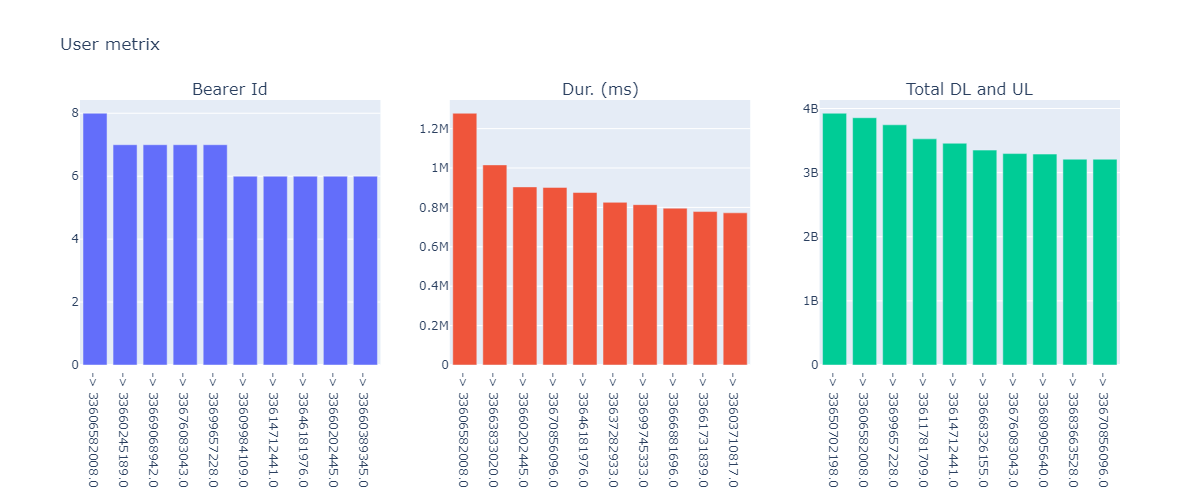

In [54]:
sessions = User_eng.nlargest(10, "Bearer Id")['Bearer Id']
duration = User_eng.nlargest(10, "Dur. (ms)")['Dur. (ms)']
data_volume = User_eng.nlargest(10, "Total DL and UL")['Total DL and UL']

mult_hist([sessions, duration, data_volume], 1,3, "User metrix", ['Bearer Id', 'Dur. (ms)','Total DL and UL'])

### The charts show that there is a wide range of user experiences across the different bearer IDs, in terms of the number of users, duration, and total data usage. This information can be used to identify areas where user experience can be improved.


### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

<Axes: >

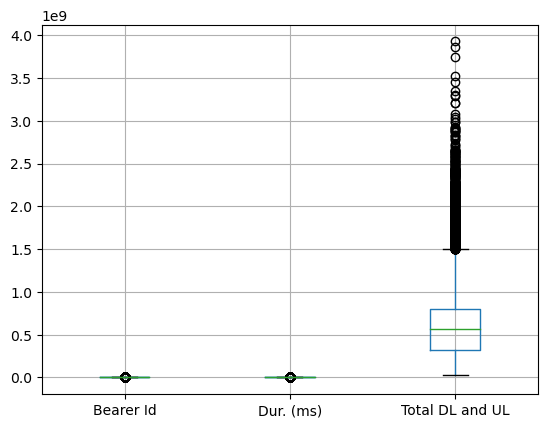

In [55]:
User_eng.boxplot()

In [56]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
scaled_array = scaler.fit_transform(User_eng)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.414641,0.116273,-0.416819
1,1.604243,2.339975,0.513794
2,-0.414641,-1.296662,-0.528482
3,-0.414641,0.015176,0.215699
4,-0.414641,1.112594,-0.086999


In [57]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.691852,0.194008,-0.695487
1,0.556403,0.811579,0.178200
2,-0.283937,-0.887926,-0.361893
3,-0.886674,0.032452,0.461255
4,-0.348283,0.934537,-0.073076


In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([2, 0, 1, ..., 0, 1, 2])

In [59]:
User_eng.insert(0, 'Cluster', kmeans.labels_)
User_eng.head(5)

,Cluster,Bearer Id,Dur. (ms),Total DL and UL
MSISDN/Number,,,,
3.360301e+10,2,1,135968.0,446771227.0
3.360301e+10,0,2,317851.0,784493240.0
3.360302e+10,1,1,20400.0,406248470.0
3.360302e+10,1,1,127699.0,676313892.0
3.360302e+10,0,1,217460.0,566463790.0


In [60]:
User_eng['Cluster'].value_counts()

Cluster
2    22818
1    16496
0    15394
Name: count, dtype: int64

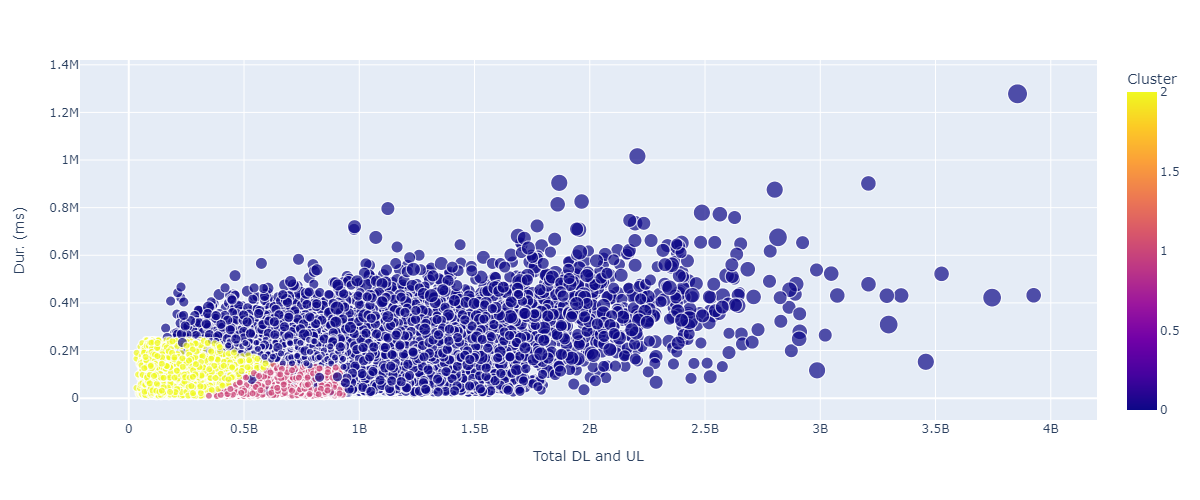

In [61]:
fig = px.scatter(User_eng, x='Total DL and UL', y="Dur. (ms)", color='Cluster', size='Bearer Id')
Image(pio.to_image(fig, format='png', width=1200))

### The blue cluster is the largest and occupies the majority of the space in the plot, while the pink and yellow clusters are smaller and appear concentrated in the bottom left corner of the plot. The blue cluster has more data points, and those points are more spread out compared to the other clusters, whereas the yellow and pink clusters are tightly packed. The plot also shows that the blue cluster has a higher average value for both "Total DL and UL" and "Dur. (ms)" compared to the other clusters.



### Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.


In [62]:
#Cluster 1 Description 

cluser_1 =  User_eng[User_eng['Cluster'] == 0]
cluser_1.describe()


,Cluster,Bearer Id,Dur. (ms),Total DL and UL
count,15394.0,15394.000000,1.539400e+04,1.539400e+04
mean,0.0,1.726777,2.073211e+05,9.491955e+08
std,0.0,0.700383,9.303006e+04,3.884445e+08
min,0.0,1.000000,2.137400e+04,1.489335e+08
25%,0.0,1.000000,1.544952e+05,6.900934e+08
50%,0.0,2.000000,1.858270e+05,8.533646e+08
75%,0.0,2.000000,2.502552e+05,1.147591e+09
max,0.0,8.000000,1.278102e+06,3.925715e+09


In [63]:
#Cluster 2 Description 

cluser_2 =  User_eng[User_eng['Cluster'] == 1]
cluser_2.describe()

,Cluster,Bearer Id,Dur. (ms),Total DL and UL
count,16496.0,16496.0,16496.000000,1.649600e+04
mean,1.0,1.0,71480.151249,6.909557e+08
std,0.0,0.0,35524.921376,1.370484e+08
min,1.0,1.0,7426.000000,3.350035e+08
25%,1.0,1.0,37297.250000,5.899796e+08
50%,1.0,1.0,81446.000000,6.954137e+08
75%,1.0,1.0,98351.000000,8.054967e+08
max,1.0,1.0,142009.000000,9.482341e+08


In [64]:
#Cluster 3 Description 

cluser_3 =  User_eng[User_eng['Cluster'] == 2]
cluser_3.describe()

,Cluster,Bearer Id,Dur. (ms),Total DL and UL
count,22818.0,22818.000000,22818.000000,2.281800e+04
mean,2.0,1.002104,111649.208783,2.939537e+08
std,0.0,0.045818,49735.352586,1.359801e+08
min,2.0,1.000000,7212.000000,3.324901e+07
25%,2.0,1.000000,85016.000000,1.799258e+08
50%,2.0,1.000000,107685.500000,2.864561e+08
75%,2.0,1.000000,148838.750000,3.974803e+08
max,2.0,2.000000,244881.000000,6.244384e+08


### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [65]:
apps_df = df3.groupby('MSISDN/Number').agg({'Total Gaming Data': 'sum', 'Total Youtube Data': 'sum', 'Total Netflix Data': 'sum',\
                     'Total Google Data': 'sum', 'Total Email Data': 'sum', 'Total SocialMedia Data': 'sum', 'Other Data': 'sum'})
apps_df.head(10)

,Total Gaming Data,Total Youtube Data,Total Netflix Data,Total Google Data,Total Email Data,Total SocialMedia Data,Other Data
MSISDN/Number,,,,,,,
3.360301e+10,383413600.0,8002263.0,29611179.0,5536136.0,2039022.0,1993764.0,350757949.0
3.360301e+10,613858254.0,54307554.0,71437536.0,15170074.0,4967049.0,5682720.0,779285564.0
3.360302e+10,359840693.0,18519408.0,10365592.0,1692334.0,2817736.0,1211757.0,329490308.0
3.360302e+10,630718452.0,5967559.0,13977802.0,5264678.0,2105022.0,1761423.0,726744661.0
3.360302e+10,523083841.0,8748641.0,14517732.0,9010165.0,3346496.0,2267447.0,564687908.0
3.360302e+10,354168076.0,20409463.0,20464945.0,10500959.0,1268944.0,2266645.0,200056615.0
3.360302e+10,171780534.0,18320880.0,23666015.0,1894663.0,3274325.0,1658097.0,497133201.0
3.360303e+10,661241150.0,71735426.0,30377882.0,14785820.0,7130307.0,4031071.0,780436983.0
3.360303e+10,503742257.0,41081319.0,61170139.0,20102308.0,2614712.0,3285593.0,591911366.0


In [66]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65944 entries, 0 to 65943
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bearer Id               65944 non-null  float64
 1   MSISDN/Number           65944 non-null  float64
 2   Handset Manufacturer    65944 non-null  object 
 3   Handset Type            65944 non-null  object 
 4   Dur. (ms)               65944 non-null  float64
 5   Total Youtube Data      65944 non-null  float64
 6   Total Google Data       65944 non-null  float64
 7   Total Email Data        65944 non-null  float64
 8   Total Netflix Data      65944 non-null  float64
 9   Total Gaming Data       65944 non-null  float64
 10  Other Data              65944 non-null  float64
 11  Total SocialMedia Data  65944 non-null  float64
 12  Total DL and UL         65944 non-null  float64
 13  Start ms                65944 non-null  float64
 14  End ms                  65944 non-null

In [67]:
#Top 10 users of Youtube
youtube_app_df = apps_df.groupby('MSISDN/Number')['Total Youtube Data'].sum().nlargest(10)
print(youtube_app_df)

#Top 10 users Google
Google_app_df = apps_df.groupby('MSISDN/Number')['Total Google Data'].sum().nlargest(10)
print(Google_app_df)

#Top 10 users Email
Email_app_df = apps_df.groupby('MSISDN/Number')['Total Email Data'].sum().nlargest(10)
print(Email_app_df)

#Top 10 users Netflix
Netflix_app_df = apps_df.groupby('MSISDN/Number')['Total Netflix Data'].sum().nlargest(10)
print(Netflix_app_df)

#Top 10 users Gaming
Gaming_app_df = apps_df.groupby('MSISDN/Number')['Total Gaming Data'].sum().nlargest(10)
print(Gaming_app_df)

#Top 10 users SocialMedia
SocialMedia_app_df = apps_df.groupby('MSISDN/Number')['Total SocialMedia Data'].sum().nlargest(10)
print(SocialMedia_app_df)

#Top 10 users Other
Other_app_df = apps_df.groupby('MSISDN/Number')['Other Data'].sum().nlargest(10)
print(Other_app_df)

MSISDN/Number
3.360658e+10    202592674.0
3.367608e+10    178634466.0
3.369966e+10    176066213.0
3.361471e+10    161691243.0
3.366020e+10    158492814.0
3.360998e+10    156175220.0
3.365070e+10    154029261.0
3.366173e+10    150079327.0
3.366025e+10    149359149.0
3.365991e+10    147792871.0
Name: Total Youtube Data, dtype: float64
MSISDN/Number
3.360658e+10    79754779.0
3.367608e+10    71974850.0
3.369966e+10    61458249.0
3.366025e+10    57766598.0
3.366222e+10    56875092.0
3.369896e+10    56059443.0
3.361178e+10    55702945.0
3.366367e+10    55288092.0
3.360998e+10    51671163.0
3.366037e+10    51511065.0
Name: Total Google Data, dtype: float64
MSISDN/Number
3.367608e+10    20610254.0
3.366025e+10    18128562.0
3.366173e+10    17758882.0
3.366005e+10    16806926.0
3.360658e+10    16003517.0
3.369999e+10    14845330.0
3.361177e+10    14436629.0
3.365815e+10    14409204.0
3.360318e+10    14149921.0
3.364678e+10    13940318.0
Name: Total Email Data, dtype: float64
MSISDN/Number
3.36

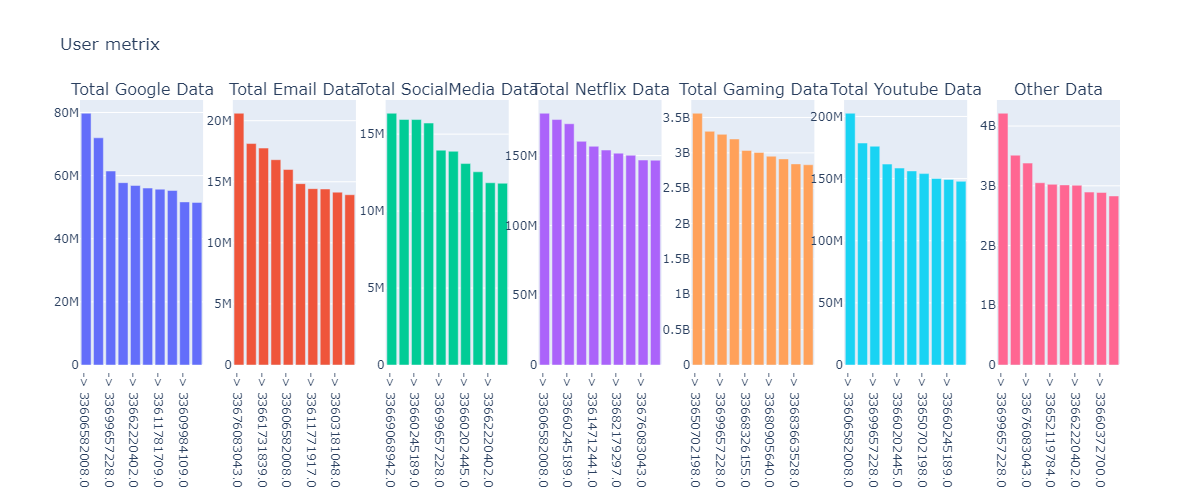

In [68]:
mult_hist([Google_app_df, Email_app_df, SocialMedia_app_df, Netflix_app_df, Gaming_app_df, youtube_app_df, Other_app_df], 1,
          7, "User metrix", [ "Total Google Data", "Total Email Data", "Total SocialMedia Data","Total Netflix Data", "Total Gaming Data","Total Youtube Data","Other Data"])

### Plot the top 3 most used applications using appropriate charts.  


Text(0, 0.5, 'Data usage')

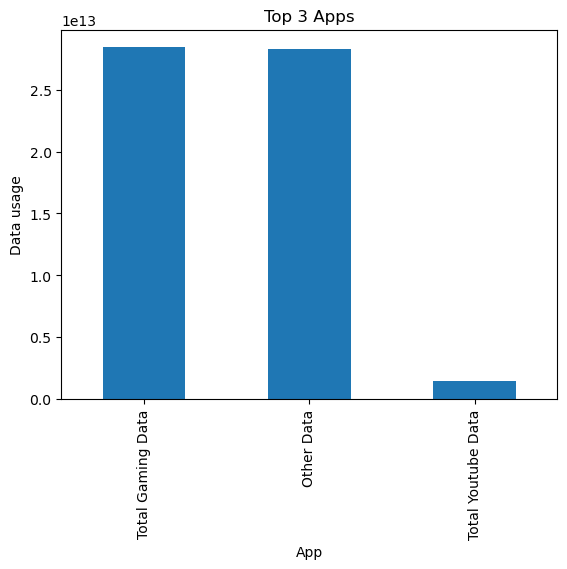

In [69]:
apps_df.sum().nlargest(3).plot(kind='bar')
plt.title('Top 3 Apps')
plt.xlabel('App')
plt.ylabel('Data usage')

#### Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
#### 1. What is the optimized value of k (use the elbow method for this)?  
#### 2. Interpret your findings. 


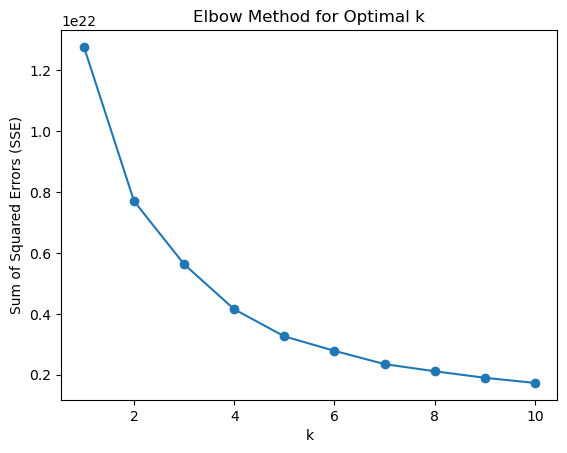

In [70]:
# Calculate SSE for each k
sse = []
for k in range(1, 11):  # Try k from 1 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(apps_df)
    sse.append(kmeans.inertia_)

# Plot the SSE curve
plt.plot(range(1, 11), sse,marker='o')
plt.xlabel('k')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

### As you can see the elblow is b/n 3 and 4. lets choose 3 as for k value

In [71]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
User_eng["cluster"]= kmeans.labels_
User_eng


,Cluster,Bearer Id,Dur. (ms),Total DL and UL,cluster
MSISDN/Number,,,,,
3.360301e+10,2,1,135968.0,446771227.0,2
3.360301e+10,0,2,317851.0,784493240.0,0
3.360302e+10,1,1,20400.0,406248470.0,1
3.360302e+10,1,1,127699.0,676313892.0,1
3.360302e+10,0,1,217460.0,566463790.0,0
...,...,...,...,...,...
3.370000e+10,2,1,145697.0,593110175.0,2
3.370000e+10,1,1,124445.0,826701934.0,1
3.370000e+10,0,1,171672.0,827412852.0,0


In [74]:
User_eng.to_csv("../Telecommunication_Industry/User_eng.csv")

In [72]:
df3

,Bearer Id,MSISDN/Number,Handset Manufacturer,Handset Type,Dur. (ms),Total Youtube Data,Total Google Data,Total Email Data,Total Netflix Data,Total Gaming Data,...,Total SocialMedia Data,Total DL and UL,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps)
0,1.311448e+19,3.368542e+10,Samsung,Samsung Galaxy A8 (2018),243504.0,32045297.0,7072799.0,3535210.0,28489330.0,522331573.0,...,2448331.0,599743023.0,467.0,829.0,1555910280000,1556153760000,127.458589,243504362.0,76881.0,69.0
1,1.311448e+19,3.366132e+10,Apple,Apple iPhone 7 (A1778),236570.0,36396501.0,5735801.0,3899599.0,21665509.0,725601428.0,...,3230386.0,798245704.0,641.0,444.0,1555913880000,1556150460000,53.000000,236570803.0,44070.0,92.0
2,1.311448e+19,3.361513e+10,Samsung,Samsung Galaxy Note 8 (Sm-N950F),231780.0,20593868.0,1000345.0,3209019.0,10640366.0,139148365.0,...,2570758.0,192095344.0,804.0,199.0,1555918680000,1556150460000,127.458589,231780395.0,69923.0,74.0
3,1.311448e+19,3.366495e+10,Huawei,Huawei P20 Lite Huawei Nova 3E,230839.0,17789231.0,9958686.0,3536943.0,19448226.0,294855187.0,...,2599788.0,359872820.0,676.0,176.0,1555919640000,1556150460000,41.000000,230839500.0,77180.0,68.0
4,7.349883e+18,3.366403e+10,Apple,Apple iPhone 6S Plus (A1687),238915.0,44496698.0,4721773.0,2498587.0,15073143.0,524941244.0,...,3489842.0,604428354.0,810.0,294.0,1555920000000,1556158920000,39.000000,238915484.0,189027.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65939,1.311448e+19,3.362611e+10,Apple,Apple iPhone Xr (A2105),125622.0,26306531.0,12459876.0,2555578.0,40974659.0,571286842.0,...,2307959.0,666947481.0,79.0,512.0,1556522880000,1556648520000,52.000000,125622433.0,65755.0,84.0
65940,7.277826e+18,3.365069e+10,Apple,Apple iPhone 8 Plus (A1897),81230.0,27955095.0,12784914.0,690876.0,37561864.0,535806880.0,...,3517065.0,631804110.0,451.0,214.0,1556522880000,1556604120000,32.000000,81230763.0,84291.0,117.0
65941,7.349883e+18,3.366345e+10,Apple,Apple iPhone Se (A1723),97970.0,22165518.0,4415361.0,2121718.0,40643294.0,631628095.0,...,2352181.0,705783925.0,483.0,187.0,1556522880000,1556620860000,29.000000,97970704.0,34023.0,77.0
65942,1.311448e+19,3.362189e+10,Apple,Apple iPhone Xs (A2097),98249.0,24516413.0,6585469.0,2058277.0,15029702.0,566933800.0,...,1260239.0,627698629.0,283.0,810.0,1556522880000,1556621160000,49.000000,98249527.0,53643.0,90.0


In [73]:
df3.to_csv("../Telecommunication_Industry/engagement.csv")